In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('cleaned data.xlsx')
df.head(5)

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2019,Orange,Inpatient,Inpatient Rehabilitation,18 through 24,All Others,1
1,2019,Orange,Inpatient,Inpatient Rehabilitation,18 through 24,Cocaine,1
2,2019,Orange,Inpatient,Inpatient Rehabilitation,18 through 24,Marijuana,4
3,2019,Orange,Inpatient,Inpatient Rehabilitation,18 through 24,Other Opioids,2
4,2019,Orange,Inpatient,Inpatient Rehabilitation,18 through 24,Heroin,5


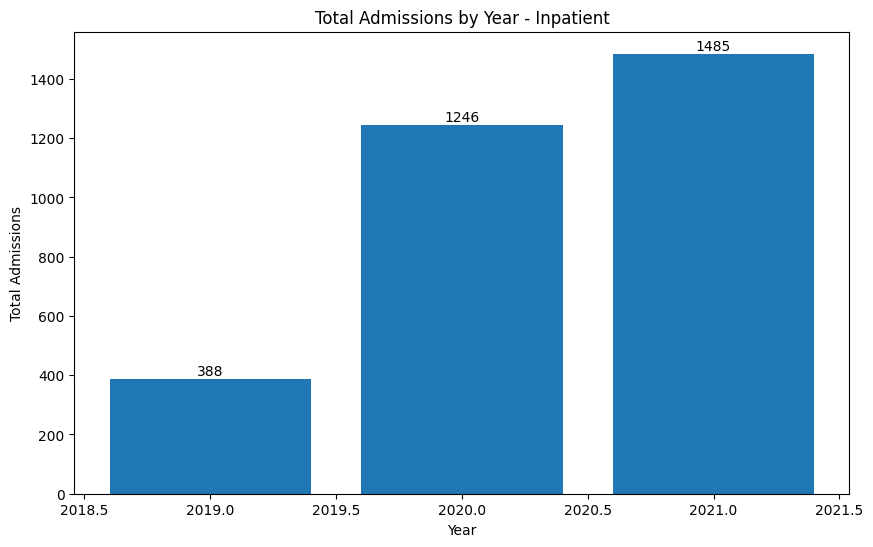

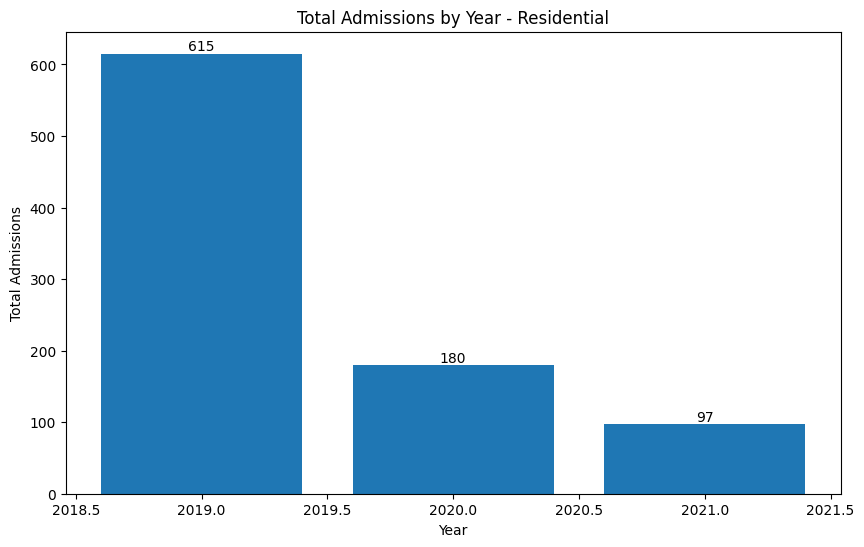

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
df = pd.read_excel('cleaned data.xlsx')

# Group the data by Program Category, Year and calculate the sum of Admissions for each combination
grouped_df = df.groupby(['Program Category', 'Year'])['Admissions'].sum().reset_index(name='Total Admissions')

# Sort the DataFrame by Program Category and Year
grouped_df = grouped_df.sort_values(['Program Category', 'Year'])

# Get unique Program Categories
program_categories = grouped_df['Program Category'].unique()

# Create a bar chart for each Program Category
for program_category in program_categories:
    # Filter the data for the current Program Category
    filtered_df = grouped_df[grouped_df['Program Category'] == program_category]

    # Create a new figure for each Program Category
    plt.figure(figsize=(10, 6))

    # Create the bar chart
    bars = plt.bar(filtered_df['Year'], filtered_df['Total Admissions'])

    # Add numeric labels on each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

    # Set the labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Admissions')
    plt.title(f'Total Admissions by Year - {program_category}')

    # Display the bar chart for the current Program Category
    plt.show()


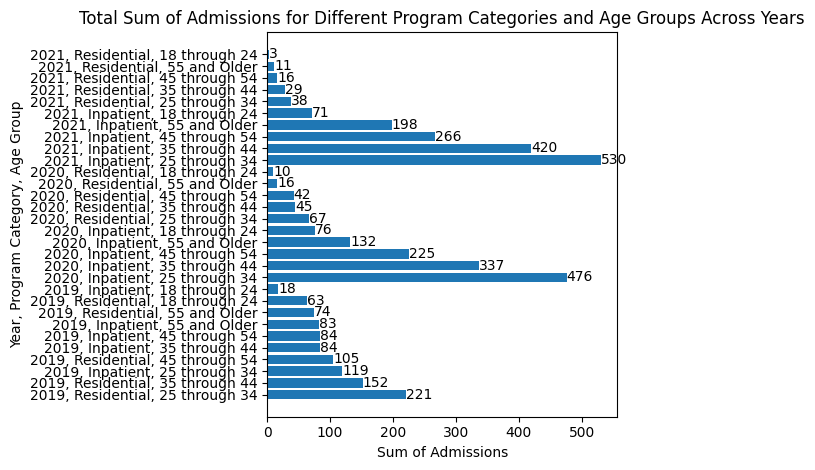

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
df = pd.read_excel('cleaned data.xlsx')

# Group the data by Year, Program Category, and Age Group and calculate the sum of Admissions
grouped_df = df.groupby(['Year', 'Program Category', 'Age Group'])['Admissions'].sum().reset_index(name='Sum_Admissions')

# Sort the DataFrame by Year and Sum_Admissions in descending order
grouped_df = grouped_df.sort_values(['Year', 'Sum_Admissions'], ascending=[True, False])

# Create a horizontal bar chart using matplotlib
fig, ax = plt.subplots()
bars = ax.barh(range(len(grouped_df)),
               grouped_df['Sum_Admissions'],
               align='center',
               tick_label=grouped_df['Year'].astype(str) + ', ' + grouped_df['Program Category'] + ', ' + grouped_df['Age Group'])

# Add numeric labels for each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

ax.set_xlabel('Sum of Admissions')
ax.set_ylabel('Year, Program Category, Age Group')
plt.title('Total Sum of Admissions for Different Program Categories and Age Groups Across Years')

# Adjust layout to avoid label overlapping
plt.tight_layout()

# Display the bar chart
plt.show()


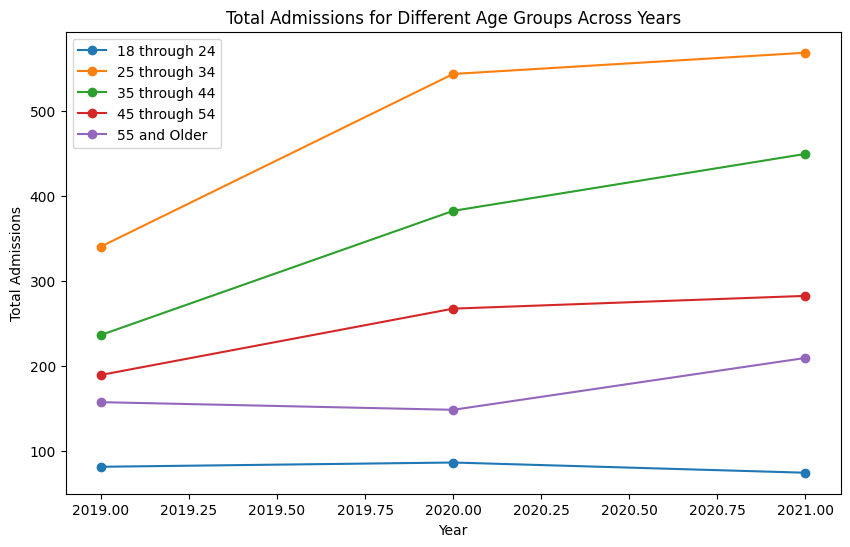

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
df = pd.read_excel('cleaned data.xlsx')

# Group the data by Year and Age Group and calculate the sum of Admissions for each Year-Age Group combination
grouped_df = df.groupby(['Year', 'Age Group'])['Admissions'].sum().reset_index(name='Total Admissions')

# Pivot the data to have Age Groups as columns and Years as the index
pivot_df = grouped_df.pivot(index='Year', columns='Age Group', values='Total Admissions')

# Create a line plot using matplotlib
pivot_df.plot(marker='o', figsize=(10, 6))

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Admissions')
plt.title('Total Admissions for Different Age Groups Across Years')

# Display the line plot
plt.legend()
plt.show()


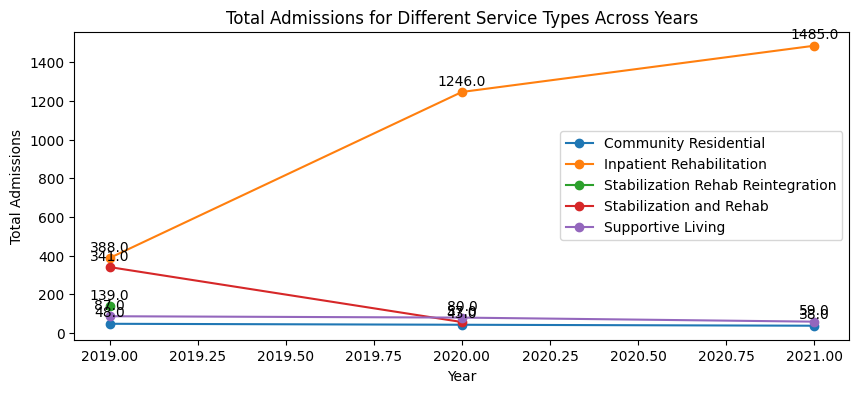

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
df = pd.read_excel('cleaned data.xlsx')

# Group the data by Year and Service Type and calculate the sum of Admissions for each Year-Service Type combination
grouped_df = df.groupby(['Year', 'Service Type'])['Admissions'].sum().reset_index(name='Total Admissions')

# Pivot the data to have Service Types as columns and Years as the index
pivot_df = grouped_df.pivot(index='Year', columns='Service Type', values='Total Admissions')

# Create a line plot using matplotlib
ax = pivot_df.plot(marker='o', figsize=(10, 4))

# Add numeric labels for each data point on the line plot
for column in pivot_df.columns:
    for year, value in pivot_df[column].items():
        ax.annotate(value, (year, value), textcoords="offset points", xytext=(0,5), ha='center')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Total Admissions')
plt.title('Total Admissions for Different Service Types Across Years')

# Display the line plot
plt.legend()
plt.show()


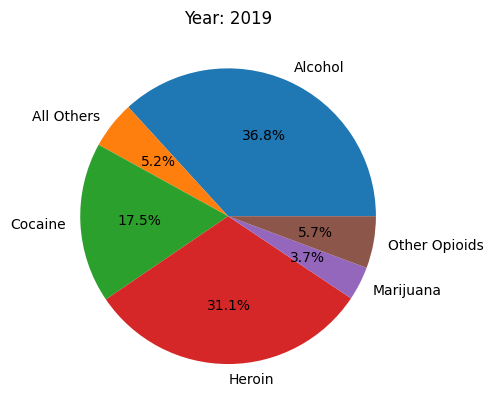

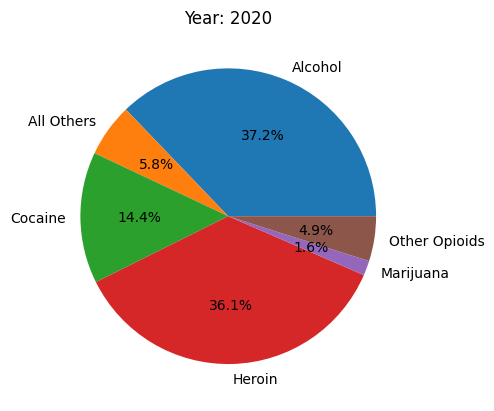

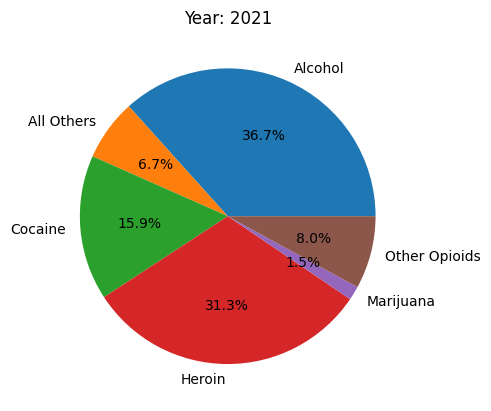

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
df = pd.read_excel('cleaned data.xlsx')

# Group the data by year and substance group and calculate the sum of admissions
grouped_df = df.groupby(['Year', 'Primary Substance Group'])['Admissions'].sum().reset_index(name='Sum Admissions')

# Plot a pie chart for each year
years = grouped_df['Year'].unique()

for year in years:
    # Filter the data for the current year
    filtered_df = grouped_df[grouped_df['Year'] == year]

    # Plot a pie chart
    plt.figure()
    plt.pie(filtered_df['Sum Admissions'], labels=filtered_df['Primary Substance Group'], autopct='%1.1f%%')
    plt.title(f'Year: {year}')

# Display the pie charts
plt.show()


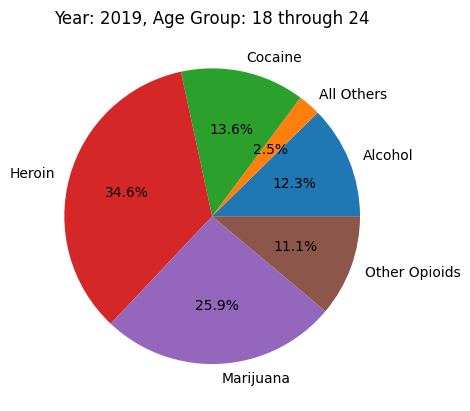

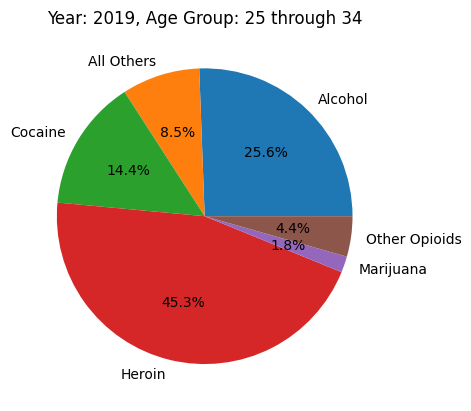

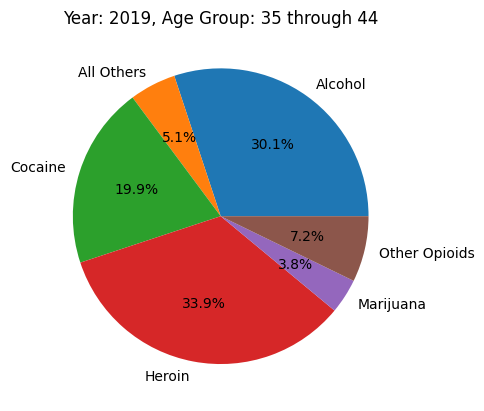

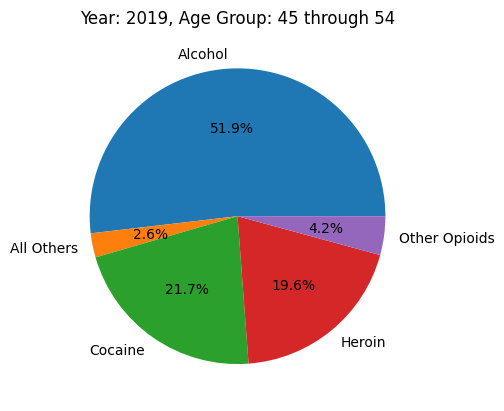

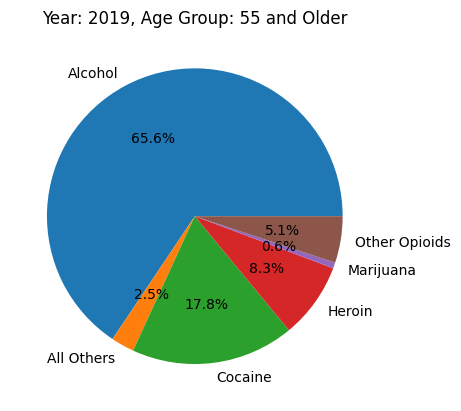

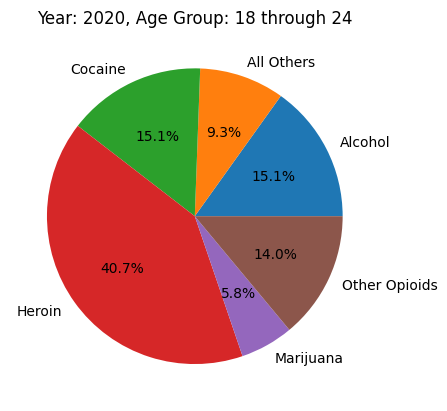

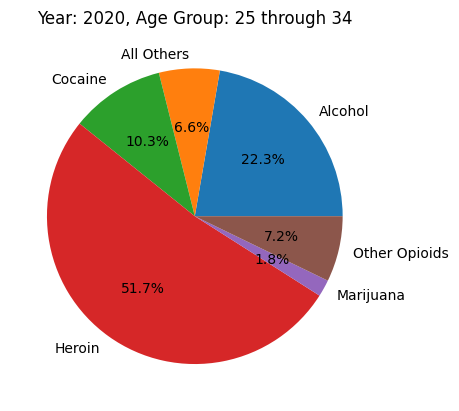

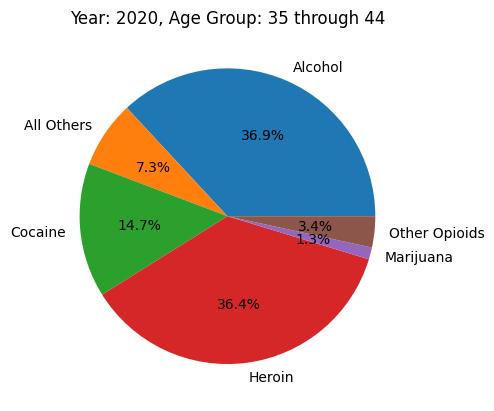

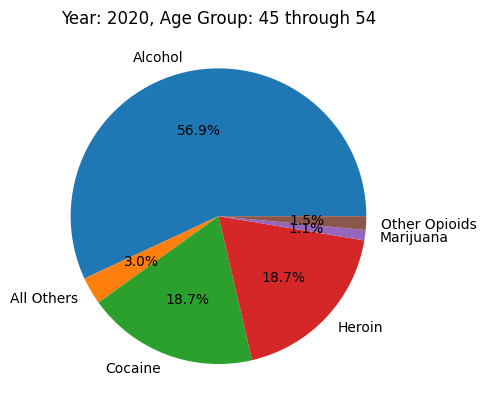

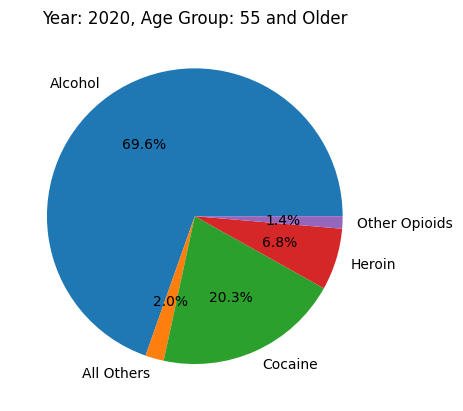

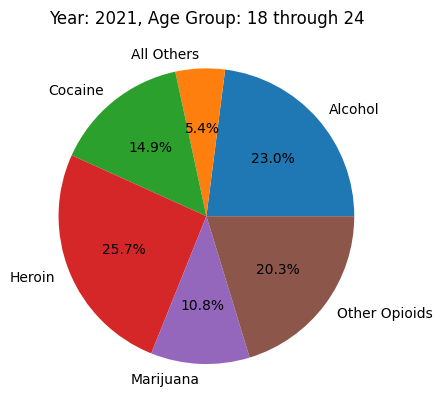

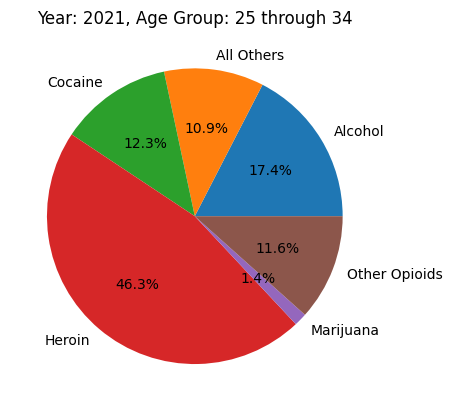

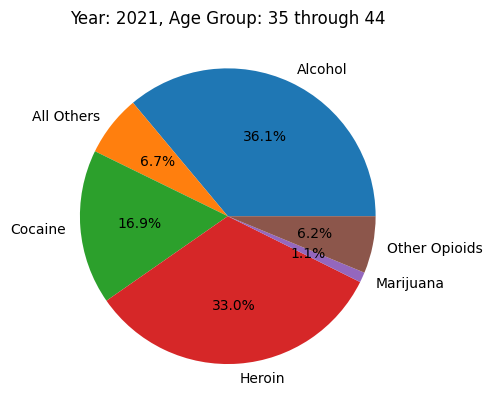

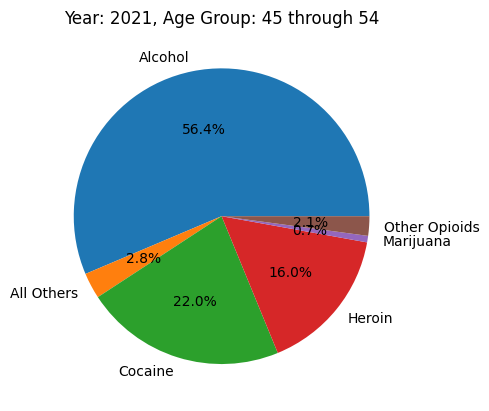

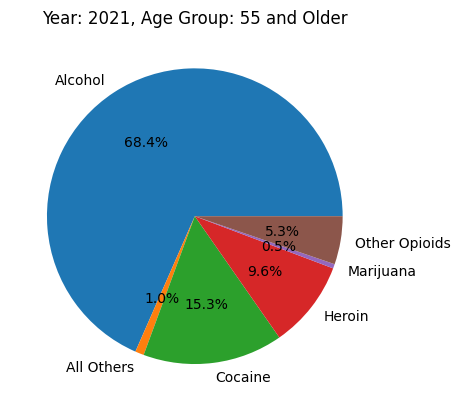

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file into a DataFrame
df = pd.read_excel('cleaned data.xlsx')

# Group the data by year, age group, and substance group and calculate the sum of admissions
grouped_df = df.groupby(['Year', 'Age Group', 'Primary Substance Group'])['Admissions'].sum().reset_index(name='Sum Admissions')

# Create a pie chart for each year and age group
years = grouped_df['Year'].unique()
age_groups = grouped_df['Age Group'].unique()

for year in years:
    for age_group in age_groups:
        # Filter the data for the current year and age group
        filtered_df = grouped_df[(grouped_df['Year'] == year) & (grouped_df['Age Group'] == age_group)]

        # Plot a pie chart
        plt.figure()
        plt.pie(filtered_df['Sum Admissions'], labels=filtered_df['Primary Substance Group'], autopct='%1.1f%%')
        plt.title(f'Year: {year}, Age Group: {age_group}')

# Display the pie charts
plt.show()
